The Following algorithms will be used for comparing performance on each of the 5 datasets:

Logistic Regression

K-Nearest Neighbor

Decision Tree

Random Forest

Bernoulli Naive Bayes

In [69]:
# Mounting Drive
from google.colab import drive
drive.mount ('/content/drive')
# Directing program to same directory as the csv file and ipynb file in the next code cell

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
cd '/content/drive/MyDrive/Colab Notebooks' 

/content/drive/MyDrive/Colab Notebooks


In [71]:
# Importing Pandas
import pandas as pd
# Imports from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [72]:
# Learning function to get the performance for the training and testing sets, as well as the confusion matrix.
def learning (X_train, X_test, y_train, y_test, model):
  model = model.fit(X_train, y_train)
  predTrainLearning = model.predict(X_train)
  predTestLearning = model.predict(X_test)
  print("Performance (Train): ")
  print(metrics.classification_report(y_train, predTrainLearning))
  print("Performance (Test): ")
  print(metrics.classification_report(y_test, predTestLearning))
  print("Confusion Matrix (Test): ")
  print(metrics.ConfusionMatrixDisplay.from_predictions(y_test, predTestLearning))
  return model

#Dataset 1: Kidney Disease Prediction



Source: https://www.kaggle.com/datasets/abhia1999/chronic-kidney-disease

In [73]:
# Reading the dataset file from Google Drive
kidney = pd.read_csv('kidney.csv')
# Displaying the dataset
print(kidney)
# Separating the Input features and the Output features
IN_kidney = kidney[['Bp','Sg','Al','Su','Rbc','Bu','Sc','Sod','Pot','Hemo','Wbcc','Rbcc','Htn']]
OUT_kidney = kidney['Class']
# Creating X and Y training and testing sets by way of train_test_split
X_kidney = IN_kidney.values
y_kidney = OUT_kidney.values
X_train_kidney, X_test_kidney, y_train_kidney, y_test_kidney = train_test_split(X_kidney, y_kidney,test_size=0.2, train_size=0.8)
# Standardizing the X training and testing datasets
sc_kidney = StandardScaler().fit(X_train_kidney)
X_train_std_kidney = sc_kidney.transform(X_train_kidney)
X_test_std_kidney = sc_kidney.transform(X_test_kidney)

       Bp     Sg   Al   Su  Rbc    Bu   Sc     Sod   Pot  Hemo    Wbcc  Rbcc  \
0    80.0  1.020  1.0  0.0  1.0  36.0  1.2  137.53  4.63  15.4  7800.0  5.20   
1    50.0  1.020  4.0  0.0  1.0  18.0  0.8  137.53  4.63  11.3  6000.0  4.71   
2    80.0  1.010  2.0  3.0  1.0  53.0  1.8  137.53  4.63   9.6  7500.0  4.71   
3    70.0  1.005  4.0  0.0  1.0  56.0  3.8  111.00  2.50  11.2  6700.0  3.90   
4    80.0  1.010  2.0  0.0  1.0  26.0  1.4  137.53  4.63  11.6  7300.0  4.60   
..    ...    ...  ...  ...  ...   ...  ...     ...   ...   ...     ...   ...   
395  80.0  1.020  0.0  0.0  1.0  49.0  0.5  150.00  4.90  15.7  6700.0  4.90   
396  70.0  1.025  0.0  0.0  1.0  31.0  1.2  141.00  3.50  16.5  7800.0  6.20   
397  80.0  1.020  0.0  0.0  1.0  26.0  0.6  137.00  4.40  15.8  6600.0  5.40   
398  60.0  1.025  0.0  0.0  1.0  50.0  1.0  135.00  4.90  14.2  7200.0  5.90   
399  80.0  1.025  0.0  0.0  1.0  18.0  1.1  141.00  3.50  15.8  6800.0  6.10   

     Htn  Class  
0    1.0      1  
1  

Logistic Regression Model: 
Performance (Train): 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       118
           1       0.99      0.98      0.99       202

    accuracy                           0.98       320
   macro avg       0.98      0.99      0.98       320
weighted avg       0.98      0.98      0.98       320

Performance (Test): 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.98      1.00      0.99        48

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80

Confusion Matrix (Test): 


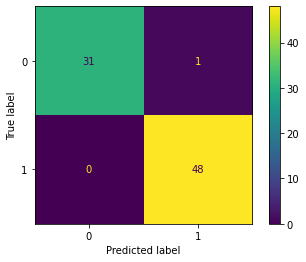

In [74]:
print("Logistic Regression Model: ")
logreg_kidney = LogisticRegression(max_iter=10000)
logreg_kidney = learning(X_train_std_kidney, X_test_std_kidney, y_train_kidney, y_test_kidney, logreg_kidney)

KNN Model: 
Performance (Train): 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       118
           1       0.99      0.98      0.98       202

    accuracy                           0.98       320
   macro avg       0.97      0.98      0.98       320
weighted avg       0.98      0.98      0.98       320

Performance (Test): 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.98      1.00      0.99        48

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80

Confusion Matrix (Test): 


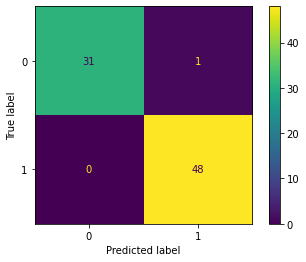

In [75]:
print("KNN Model: ")
neigh_kidney = KNeighborsClassifier()
neigh_kidney = learning(X_train_std_kidney, X_test_std_kidney, y_train_kidney, y_test_kidney, neigh_kidney)

Decision Tree Model: 
Performance (Train): 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       118
           1       0.98      1.00      0.99       202

    accuracy                           0.99       320
   macro avg       0.99      0.98      0.99       320
weighted avg       0.99      0.99      0.99       320

Performance (Test): 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.98      1.00      0.99        48

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80

Confusion Matrix (Test): 


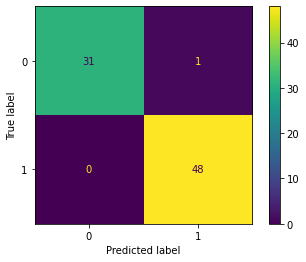

In [76]:
print("Decision Tree Model: ")
tree_kidney = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_kidney = learning(X_train_std_kidney, X_test_std_kidney, y_train_kidney, y_test_kidney, tree_kidney)

Random Forest Model:
Performance (Train): 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       118
           1       0.99      0.99      0.99       202

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320

Performance (Test): 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.98      1.00      0.99        48

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80

Confusion Matrix (Test): 


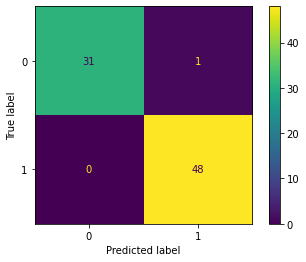

In [77]:
print("Random Forest Model:")
rf_kidney = RandomForestClassifier(n_estimators = 50, max_depth = 3, random_state=42)
rf_kidney = learning(X_train_std_kidney, X_test_std_kidney, y_train_kidney, y_test_kidney, rf_kidney)

Bernoulli Naïve Bayes Model: 
Performance (Train): 
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       118
           1       0.99      0.95      0.97       202

    accuracy                           0.96       320
   macro avg       0.95      0.96      0.96       320
weighted avg       0.96      0.96      0.96       320

Performance (Test): 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        32
           1       1.00      0.92      0.96        48

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80

Confusion Matrix (Test): 


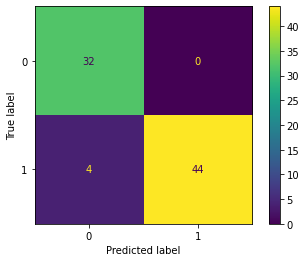

In [78]:
print('Bernoulli Naïve Bayes Model: ')
bnb_kidney = BernoulliNB(alpha = 1.0)
bnb_kidney = learning(X_train_std_kidney, X_test_std_kidney, y_train_kidney, y_test_kidney, bnb_kidney)

#Dataset 2: Employee's Future Prediction
Source: https://www.kaggle.com/datasets/tejashvi14/employee-future-prediction



In [79]:
# Reading the dataset file from Google Drive
employees = pd.read_csv('employee.csv')
# Displaying the dataset
print(employees)
# Applying one-hot encoding for the dataset
oheEmployees = pd.get_dummies(employees)
# Separating the Input features and the Output features
IN_employees = oheEmployees[['JoiningYear','PaymentTier','Age','ExperienceInCurrentDomain','Education_Bachelors','Education_Masters','Education_PHD','City_Bangalore','City_New Delhi','City_Pune','Gender_Female','Gender_Male','EverBenched_No','EverBenched_Yes']]
OUT_employees = oheEmployees['LeaveOrNot']
# Creating X and Y training and testing sets by way of train_test_split
X_employees = IN_employees.values
y_employees = OUT_employees.values
X_train_employees, X_test_employees, y_train_employees, y_test_employees = train_test_split(X_employees, y_employees,test_size=0.2, train_size=0.8)
# Standardizing the X training and testing datasets
sc_employees = StandardScaler().fit(X_train_employees)
X_train_std_employees = sc_employees.transform(X_train_employees)
X_test_std_employees = sc_employees.transform(X_test_employees)

      Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0     Bachelors         2017  Bangalore            3   34    Male          No   
1     Bachelors         2013       Pune            1   28  Female          No   
2     Bachelors         2014  New Delhi            3   38  Female          No   
3       Masters         2016  Bangalore            3   27    Male          No   
4       Masters         2017       Pune            3   24    Male         Yes   
...         ...          ...        ...          ...  ...     ...         ...   
4648  Bachelors         2013  Bangalore            3   26  Female          No   
4649    Masters         2013       Pune            2   37    Male          No   
4650    Masters         2018  New Delhi            3   27    Male          No   
4651  Bachelors         2012  Bangalore            3   30    Male         Yes   
4652  Bachelors         2015  Bangalore            3   33    Male         Yes   

      ExperienceInCurrentDo

Logistic Regression Model: 
Performance (Train): 
              precision    recall  f1-score   support

           0       0.75      0.90      0.81      2424
           1       0.69      0.43      0.53      1298

    accuracy                           0.73      3722
   macro avg       0.72      0.66      0.67      3722
weighted avg       0.73      0.73      0.71      3722

Performance (Test): 
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       629
           1       0.68      0.42      0.52       302

    accuracy                           0.75       931
   macro avg       0.72      0.66      0.67       931
weighted avg       0.74      0.75      0.73       931

Confusion Matrix (Test): 


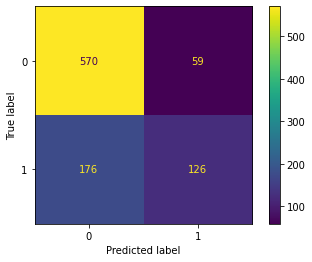

In [80]:
print("Logistic Regression Model: ")
logreg_employees = LogisticRegression(max_iter=10000)
logreg_employees = learning(X_train_std_employees, X_test_std_employees, y_train_employees, y_test_employees, logreg_employees)

KNN Model: 
Performance (Train): 
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2424
           1       0.84      0.68      0.75      1298

    accuracy                           0.84      3722
   macro avg       0.84      0.81      0.82      3722
weighted avg       0.84      0.84      0.84      3722

Performance (Test): 
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       629
           1       0.81      0.64      0.72       302

    accuracy                           0.84       931
   macro avg       0.83      0.79      0.80       931
weighted avg       0.83      0.84      0.83       931

Confusion Matrix (Test): 


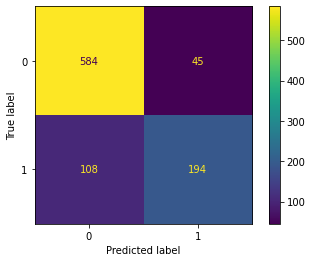

In [81]:
print("KNN Model: ")
neigh_employees = KNeighborsClassifier()
neigh_employees = learning(X_train_std_employees, X_test_std_employees, y_train_employees, y_test_employees, neigh_employees)

Decision Tree Model: 
Performance (Train): 
              precision    recall  f1-score   support

           0       0.78      0.94      0.85      2424
           1       0.82      0.50      0.62      1298

    accuracy                           0.79      3722
   macro avg       0.80      0.72      0.74      3722
weighted avg       0.79      0.79      0.77      3722

Performance (Test): 
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       629
           1       0.81      0.50      0.62       302

    accuracy                           0.80       931
   macro avg       0.80      0.72      0.74       931
weighted avg       0.80      0.80      0.78       931

Confusion Matrix (Test): 


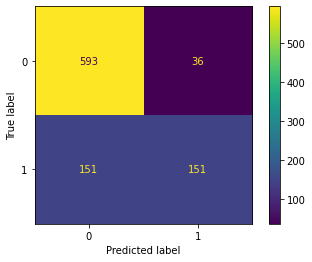

In [82]:
print("Decision Tree Model: ")
tree_employees = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_employees = learning(X_train_std_employees, X_test_std_employees, y_train_employees, y_test_employees, tree_employees)

Random Forest Model:
Performance (Train): 
              precision    recall  f1-score   support

           0       0.77      0.98      0.86      2424
           1       0.91      0.45      0.60      1298

    accuracy                           0.79      3722
   macro avg       0.84      0.71      0.73      3722
weighted avg       0.82      0.79      0.77      3722

Performance (Test): 
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       629
           1       0.89      0.50      0.64       302

    accuracy                           0.82       931
   macro avg       0.85      0.73      0.76       931
weighted avg       0.83      0.82      0.80       931

Confusion Matrix (Test): 


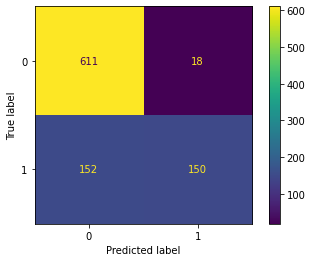

In [83]:
print("Random Forest Model:")
rf_employees = RandomForestClassifier(n_estimators = 50, max_depth = 3, random_state=42)
rf_employees = learning(X_train_std_employees, X_test_std_employees, y_train_employees, y_test_employees, rf_employees)

Bernoulli Naïve Bayes Model: 
Performance (Train): 
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      2424
           1       0.61      0.54      0.57      1298

    accuracy                           0.72      3722
   macro avg       0.69      0.68      0.68      3722
weighted avg       0.71      0.72      0.72      3722

Performance (Test): 
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       629
           1       0.61      0.56      0.58       302

    accuracy                           0.74       931
   macro avg       0.70      0.69      0.70       931
weighted avg       0.73      0.74      0.74       931

Confusion Matrix (Test): 


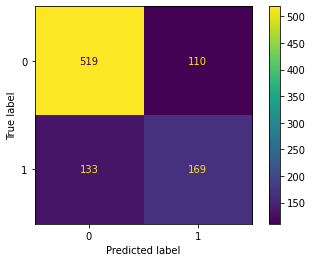

In [84]:
print('Bernoulli Naïve Bayes Model: ')
bnb_employees = BernoulliNB(alpha = 1.0)
bnb_employees = learning(X_train_std_employees, X_test_std_employees, y_train_employees, y_test_employees, bnb_employees)

#Dataset 3: Diabities Prediction
Source: https://www.kaggle.com/datasets/whenamancodes/predict-diabities

In [85]:
# Reading the dataset file from Google Drive
diabetes = pd.read_csv('diabetes.csv')
# Displaying the dataset
print(diabetes)
# Separating the Input features and the Output features
IN_diabetes = diabetes[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
OUT_diabetes = diabetes['Outcome']
# Creating X and Y training and testing sets by way of train_test_split
X_diabetes = IN_diabetes.values
y_diabetes = OUT_diabetes.values
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, y_diabetes,test_size=0.2, train_size=0.8)
# Standardizing the X training and testing datasets
sc_diabetes = StandardScaler().fit(X_train_diabetes)
X_train_std_diabetes = sc_diabetes.transform(X_train_diabetes)
X_test_std_diabetes = sc_diabetes.transform(X_test_diabetes)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

Logistic Regression Model: 
Performance (Train): 
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       403
           1       0.73      0.56      0.63       211

    accuracy                           0.78       614
   macro avg       0.76      0.73      0.74       614
weighted avg       0.77      0.78      0.77       614

Performance (Test): 
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        97
           1       0.70      0.65      0.67        57

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.76      0.77      0.76       154

Confusion Matrix (Test): 


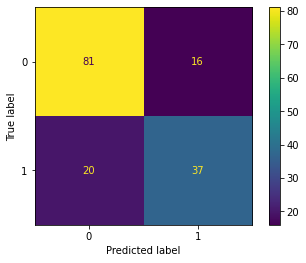

In [86]:
print("Logistic Regression Model: ")
logreg_diabetes = LogisticRegression(max_iter=10000)
logreg_diabetes = learning(X_train_std_diabetes, X_test_std_diabetes, y_train_diabetes, y_test_diabetes, logreg_diabetes)

KNN Model: 
Performance (Train): 
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       403
           1       0.80      0.67      0.73       211

    accuracy                           0.83       614
   macro avg       0.82      0.79      0.80       614
weighted avg       0.83      0.83      0.82       614

Performance (Test): 
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        97
           1       0.63      0.56      0.59        57

    accuracy                           0.71       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.71      0.71      0.71       154

Confusion Matrix (Test): 


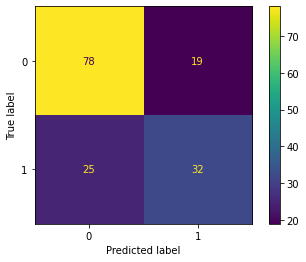

In [87]:
print("KNN Model: ")
neigh_diabetes = KNeighborsClassifier()
neigh_diabetes = learning(X_train_std_diabetes, X_test_std_diabetes, y_train_diabetes, y_test_diabetes, neigh_diabetes)

Decision Tree Model: 
Performance (Train): 
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       403
           1       0.69      0.63      0.66       211

    accuracy                           0.78       614
   macro avg       0.75      0.74      0.75       614
weighted avg       0.77      0.78      0.77       614

Performance (Test): 
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        97
           1       0.71      0.61      0.66        57

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154

Confusion Matrix (Test): 


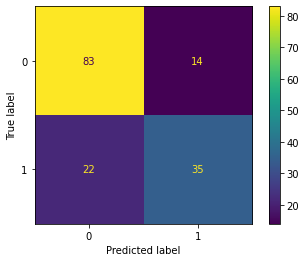

In [88]:
print("Decision Tree Model: ")
tree_diabetes = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_diabetes = learning(X_train_std_diabetes, X_test_std_diabetes, y_train_diabetes, y_test_diabetes, tree_diabetes)

Random Forest Model:
Performance (Train): 
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       403
           1       0.80      0.52      0.63       211

    accuracy                           0.79       614
   macro avg       0.79      0.72      0.74       614
weighted avg       0.79      0.79      0.77       614

Performance (Test): 
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        97
           1       0.69      0.58      0.63        57

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154

Confusion Matrix (Test): 


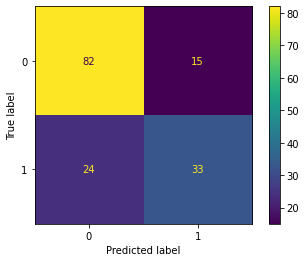

In [89]:
print("Random Forest Model:")
rf_diabetes = RandomForestClassifier(n_estimators = 50, max_depth = 3, random_state=42)
rf_diabetes = learning(X_train_std_diabetes, X_test_std_diabetes, y_train_diabetes, y_test_diabetes, rf_diabetes)

Bernoulli Naïve Bayes Model: 
Performance (Train): 
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       403
           1       0.64      0.60      0.62       211

    accuracy                           0.74       614
   macro avg       0.72      0.71      0.71       614
weighted avg       0.74      0.74      0.74       614

Performance (Test): 
              precision    recall  f1-score   support

           0       0.75      0.73      0.74        97
           1       0.56      0.58      0.57        57

    accuracy                           0.68       154
   macro avg       0.65      0.66      0.65       154
weighted avg       0.68      0.68      0.68       154

Confusion Matrix (Test): 


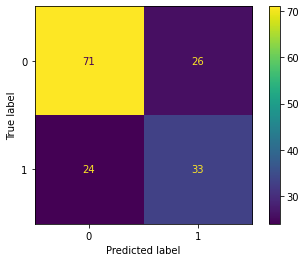

In [90]:
print('Bernoulli Naïve Bayes Model: ')
bnb_diabetes = BernoulliNB(alpha = 1.0)
bnb_diabetes = learning(X_train_std_diabetes, X_test_std_diabetes, y_train_diabetes, y_test_diabetes, bnb_diabetes)

#Dataset 4: Students Going to College Prediction
Source: https://www.kaggle.com/datasets/saddamazyazy/go-to-college-dataset

In [91]:
# Reading the dataset file from Google Drive
college = pd.read_csv('college.csv')
# Displaying the dataset
print(college)
# Applying one-hot encoding for the dataset
oheCollege = pd.get_dummies(college[['type_school','school_accreditation','gender','interest','residence','parent_age','parent_salary','house_area','average_grades','parent_was_in_college']])
# Separating the Input features and the Output features
IN_college = oheCollege
OUT_college = college['will_go_to_college']
# Creating X and Y training and testing sets by way of train_test_split
X_college = IN_college.values
y_college = OUT_college.values
X_train_college, X_test_college, y_train_college, y_test_college = train_test_split(X_college, y_college,test_size=0.2, train_size=0.8)
# Standardizing the X training and testing datasets
sc_college = StandardScaler().fit(X_train_college)
X_train_std_college = sc_college.transform(X_train_college)
X_test_std_college = sc_college.transform(X_test_college)

    type_school school_accreditation  gender         interest residence  \
0      Academic                    A    Male  Less Interested     Urban   
1      Academic                    A    Male  Less Interested     Urban   
2      Academic                    B  Female  Very Interested     Urban   
3    Vocational                    B    Male  Very Interested     Rural   
4      Academic                    A  Female  Very Interested     Urban   
..          ...                  ...     ...              ...       ...   
995  Vocational                    A  Female  Very Interested     Rural   
996    Academic                    B  Female  Less Interested     Rural   
997  Vocational                    A    Male  Less Interested     Urban   
998    Academic                    B    Male        Uncertain     Rural   
999    Academic                    B    Male       Interested     Urban   

     parent_age  parent_salary  house_area  average_grades  \
0            56        6950000       

Logistic Regression Model: 
Performance (Train): 
              precision    recall  f1-score   support

       False       0.86      0.83      0.85       397
        True       0.84      0.87      0.85       403

    accuracy                           0.85       800
   macro avg       0.85      0.85      0.85       800
weighted avg       0.85      0.85      0.85       800

Performance (Test): 
              precision    recall  f1-score   support

       False       0.94      0.91      0.93       103
        True       0.91      0.94      0.92        97

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.93       200

Confusion Matrix (Test): 


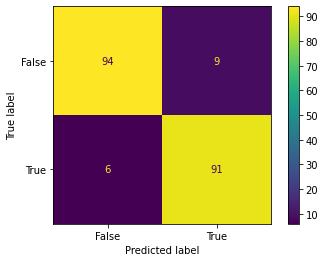

In [92]:
print("Logistic Regression Model: ")
logreg_college = LogisticRegression(max_iter=10000)
logreg_college = learning(X_train_std_college, X_test_std_college, y_train_college, y_test_college, logreg_college)

KNN Model: 
Performance (Train): 
              precision    recall  f1-score   support

       False       0.88      0.90      0.89       397
        True       0.90      0.88      0.89       403

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800

Performance (Test): 
              precision    recall  f1-score   support

       False       0.89      0.90      0.89       103
        True       0.89      0.88      0.89        97

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200

Confusion Matrix (Test): 


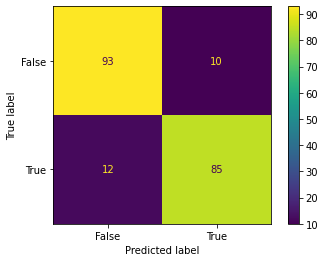

In [93]:
print("KNN Model: ")
neigh_college = KNeighborsClassifier()
neigh_college = learning(X_train_std_college, X_test_std_college, y_train_college, y_test_college, neigh_college)

Decision Tree Model: 
Performance (Train): 
              precision    recall  f1-score   support

       False       0.89      0.67      0.76       397
        True       0.74      0.92      0.82       403

    accuracy                           0.79       800
   macro avg       0.81      0.79      0.79       800
weighted avg       0.81      0.79      0.79       800

Performance (Test): 
              precision    recall  f1-score   support

       False       0.89      0.70      0.78       103
        True       0.74      0.91      0.81        97

    accuracy                           0.80       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.82      0.80      0.80       200

Confusion Matrix (Test): 


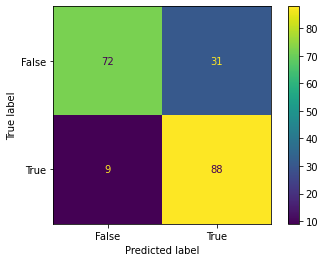

In [94]:
print("Decision Tree Model: ")
tree_college = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_college = learning(X_train_std_college, X_test_std_college, y_train_college, y_test_college, tree_college)

Random Forest Model:
Performance (Train): 
              precision    recall  f1-score   support

       False       0.83      0.89      0.86       397
        True       0.88      0.82      0.85       403

    accuracy                           0.85       800
   macro avg       0.85      0.85      0.85       800
weighted avg       0.85      0.85      0.85       800

Performance (Test): 
              precision    recall  f1-score   support

       False       0.87      0.92      0.90       103
        True       0.91      0.86      0.88        97

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200

Confusion Matrix (Test): 


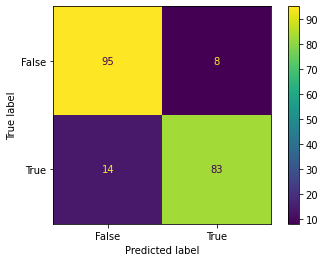

In [95]:
print("Random Forest Model:")
rf_college = RandomForestClassifier(n_estimators = 50, max_depth = 3, random_state=42)
rf_college = learning(X_train_std_college, X_test_std_college, y_train_college, y_test_college, rf_college)

Bernoulli Naïve Bayes Model: 
Performance (Train): 
              precision    recall  f1-score   support

       False       0.78      0.81      0.79       397
        True       0.80      0.77      0.79       403

    accuracy                           0.79       800
   macro avg       0.79      0.79      0.79       800
weighted avg       0.79      0.79      0.79       800

Performance (Test): 
              precision    recall  f1-score   support

       False       0.88      0.85      0.87       103
        True       0.85      0.88      0.86        97

    accuracy                           0.86       200
   macro avg       0.86      0.87      0.86       200
weighted avg       0.87      0.86      0.87       200

Confusion Matrix (Test): 


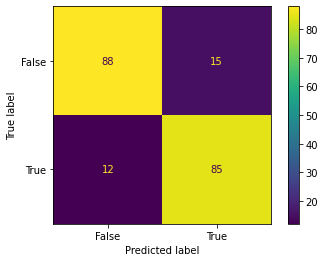

In [96]:
print('Bernoulli Naïve Bayes Model: ')
bnb_college = BernoulliNB(alpha = 1.0)
bnb_college = learning(X_train_std_college, X_test_std_college, y_train_college, y_test_college, bnb_college)

#Dataset 5: Heart Attack Prediction
Source: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [97]:
# Reading the dataset file from Google Drive
heart = pd.read_csv('heart.csv')
# Displaying the dataset
print(heart)
# Separating the Input features and the Output features
IN_heart = heart[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']]
OUT_heart = heart['output']
# Creating X and Y training and testing sets by way of train_test_split
X_heart = IN_heart.values
y_heart = OUT_heart.values
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart, y_heart,test_size=0.2, train_size=0.8)
# Standardizing the X training and testing datasets
sc_heart = StandardScaler().fit(X_train_heart)
X_train_std_heart = sc_heart.transform(X_train_heart)
X_test_std_heart = sc_heart.transform(X_test_heart)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  

Logistic Regression Model: 
Performance (Train): 
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       112
           1       0.84      0.90      0.87       130

    accuracy                           0.85       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.85      0.85      0.85       242

Performance (Test): 
              precision    recall  f1-score   support

           0       0.83      0.73      0.78        26
           1       0.82      0.89      0.85        35

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61

Confusion Matrix (Test): 


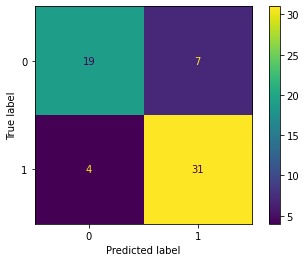

In [98]:
print("Logistic Regression Model: ")
logreg_heart = LogisticRegression(max_iter=10000)
logreg_heart = learning(X_train_std_heart, X_test_std_heart, y_train_heart, y_test_heart, logreg_heart)

KNN Model: 
Performance (Train): 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       112
           1       0.90      0.90      0.90       130

    accuracy                           0.89       242
   macro avg       0.89      0.89      0.89       242
weighted avg       0.89      0.89      0.89       242

Performance (Test): 
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        26
           1       0.79      0.89      0.84        35

    accuracy                           0.80        61
   macro avg       0.81      0.79      0.79        61
weighted avg       0.80      0.80      0.80        61

Confusion Matrix (Test): 


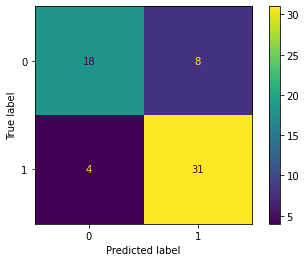

In [99]:
print("KNN Model: ")
neigh_heart = KNeighborsClassifier()
neigh_heart = learning(X_train_std_heart, X_test_std_heart, y_train_heart, y_test_heart, neigh_heart)

Decision Tree Model: 
Performance (Train): 
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       112
           1       0.86      0.94      0.90       130

    accuracy                           0.88       242
   macro avg       0.89      0.88      0.88       242
weighted avg       0.89      0.88      0.88       242

Performance (Test): 
              precision    recall  f1-score   support

           0       0.55      0.62      0.58        26
           1       0.69      0.63      0.66        35

    accuracy                           0.62        61
   macro avg       0.62      0.62      0.62        61
weighted avg       0.63      0.62      0.62        61

Confusion Matrix (Test): 


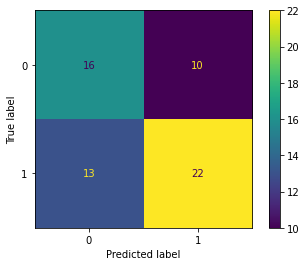

In [100]:
print("Decision Tree Model: ")
tree_heart = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_heart = learning(X_train_std_heart, X_test_std_heart, y_train_heart, y_test_heart, tree_heart)

Random Forest Model:
Performance (Train): 
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       112
           1       0.86      0.95      0.90       130

    accuracy                           0.89       242
   macro avg       0.89      0.88      0.89       242
weighted avg       0.89      0.89      0.89       242

Performance (Test): 
              precision    recall  f1-score   support

           0       0.83      0.73      0.78        26
           1       0.82      0.89      0.85        35

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61

Confusion Matrix (Test): 


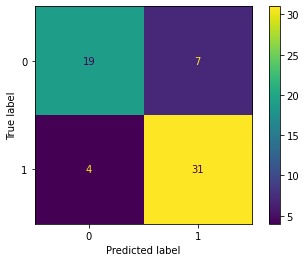

In [101]:
print("Random Forest Model:")
rf_heart = RandomForestClassifier(n_estimators = 50, max_depth = 3, random_state=42)
rf_heart = learning(X_train_std_heart, X_test_std_heart, y_train_heart, y_test_heart, rf_heart)

Bernoulli Naïve Bayes Model: 
Performance (Train): 
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       112
           1       0.85      0.89      0.87       130

    accuracy                           0.86       242
   macro avg       0.86      0.85      0.85       242
weighted avg       0.86      0.86      0.85       242

Performance (Test): 
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        26
           1       0.83      0.86      0.85        35

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61

Confusion Matrix (Test): 


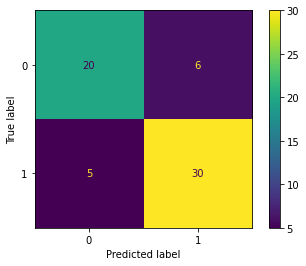

In [102]:
print('Bernoulli Naïve Bayes Model: ')
bnb_heart = BernoulliNB(alpha = 1.0)
bnb_heart = learning(X_train_std_heart, X_test_std_heart, y_train_heart, y_test_heart, bnb_heart)